In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import sklearn as sk 
from pylab import rcParams

#import libraries sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (11, 7)

pd.set_option("display.max_columns", None)

RSEED = 42

In [2]:
# updating path to my environment 
df=pd.read_csv('/Users/julianeberek/neuefische/kickstar/data/final_frame.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168979 entries, 0 to 168978
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             168979 non-null  int64  
 1   blurb                     168977 non-null  object 
 2   converted_pledged_amount  168979 non-null  int64  
 3   country                   168979 non-null  object 
 4   created_at                168979 non-null  object 
 5   deadline                  168979 non-null  object 
 6   disable_communication     168979 non-null  bool   
 7   id                        168979 non-null  int64  
 8   is_starrable              168979 non-null  bool   
 9   launched_at               168979 non-null  object 
 10  name                      168979 non-null  object 
 11  spotlight                 168979 non-null  bool   
 12  staff_pick                168979 non-null  bool   
 13  state                     168979 non-null  o

In [3]:
features = df.drop(["state"], axis=1)
target = df["state"]

In [4]:
# features_raw= features.drop(["blurb", 'created_at',	'deadline' ,  'id',  'launched_at', 'name','state_changed_at', 'subcategory', 'category', ], axis=1)

# taking out more features: country, is_starrable, disable_communication
features_raw= features.drop(["blurb", 'created_at',	'deadline' ,  'id',  'launched_at', 'name','state_changed_at', 'subcategory', 'category', 'spotlight', 'backers_count', 'is_starrable', 'disable_communication', 'converted_pledged_amount', 'ratio_target'], axis=1)

In [5]:
#features_raw= pd.get_dummies(features_raw, drop_first=True)
features_raw= pd.get_dummies(features_raw, drop_first=True)
features_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168979 entries, 0 to 168978
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   staff_pick     168979 non-null  bool   
 1   subcategy_id   168979 non-null  int64  
 2   category_id    168979 non-null  int64  
 3   month_project  168979 non-null  int64  
 4   weekday        168979 non-null  int64  
 5   duration       168979 non-null  int64  
 6   convert_goal   168979 non-null  float64
 7   country_AU     168979 non-null  uint8  
 8   country_BE     168979 non-null  uint8  
 9   country_CA     168979 non-null  uint8  
 10  country_CH     168979 non-null  uint8  
 11  country_DE     168979 non-null  uint8  
 12  country_DK     168979 non-null  uint8  
 13  country_ES     168979 non-null  uint8  
 14  country_FR     168979 non-null  uint8  
 15  country_GB     168979 non-null  uint8  
 16  country_HK     168979 non-null  uint8  
 17  country_IE     168979 non-nul

In [6]:
features_raw

,staff_pick,subcategy_id,category_id,month_project,weekday,duration,convert_goal,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,False,273,12,8,3,30,1000.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,False,43,14,5,0,30,15000.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,False,273,12,1,3,59,12160.6569,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,False,48,18,12,0,30,2800.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,False,36,14,4,3,30,3500.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,False,38,14,8,0,58,3883.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
168975,False,38,14,5,6,36,5466.5002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
168976,False,52,16,8,1,33,2500.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
168977,False,295,11,3,5,30,5500.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
target=target.replace('failed', 0).replace('successful',1)
target

0         1
1         1
2         0
3         1
4         1
         ..
168974    1
168975    1
168976    1
168977    1
168978    1
Name: state, Length: 168979, dtype: int64

In [8]:
X_train, X_test, y_train, y_test= train_test_split(features_raw, target, stratify=target, random_state=42, test_size=0.2)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 135183 samples.
Testing set has 33796 samples.


In [9]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')

<AxesSubplot:xlabel='state', ylabel='count'>

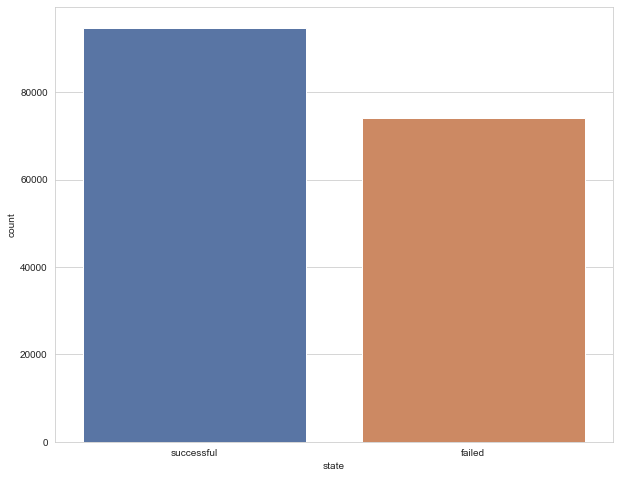

In [10]:
sns.countplot(x="state", data = df, palette='deep')

<AxesSubplot:>

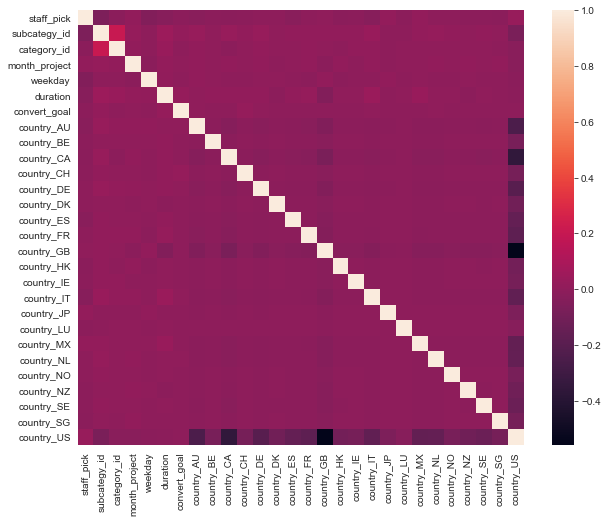

In [11]:
sns.heatmap(features_raw.corr())

In [12]:
# spotlight and subcategory are highly correlated - might be taken out (one of them)
# backers_count and converted_pledged_amount are highly correlated (take out backers count)

In [13]:
#Logistic regression 

In [14]:
#logistic_regression = LogisticRegression(penalty='l1', solver='saga', max_iter=5000) #adapted hyperparameters: penalty + 'saga'
logistic_regression = LogisticRegression(max_iter=1000) #adapted hyperparameters: penalty + 'saga'
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [52]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


print("Logistic regression score for training set:", round(logistic_regression.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logistic_regression.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

print(logistic_regression.coef_)
print(logistic_regression.r2_score)
# accuracy slightly worse than without setting hyperparameters 

Accuracy:  0.5819327731092437
Logistic regression score for training set: 0.65167
Logistic regression score for test set: 0.65167

Classification report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.40     14840
           1       0.60      0.79      0.68     18956

    accuracy                           0.58     33796
   macro avg       0.57      0.55      0.54     33796
weighted avg       0.57      0.58      0.56     33796

[[ 6.58626674e-03 -4.73890105e-03  6.09964354e-02  3.38347492e-02
   1.04276523e-02  5.55644519e-03 -1.22655735e-05 -5.45034373e-05
  -4.15266454e-05  2.15790907e-06 -2.37837907e-05 -1.56328544e-04
   1.39692374e-05 -1.19383338e-04 -2.52699736e-05  1.17105734e-03
   1.03295660e-04 -2.46537569e-05 -2.76294761e-04  1.95756980e-05
   3.99746608e-06 -1.70199163e-04 -8.62914229e-05 -1.87644796e-05
   6.24222494e-06  1.70089110e-06  2.07456174e-05  5.55740286e-03]]


AttributeError: 'LogisticRegression' object has no attribute 'r2_score'

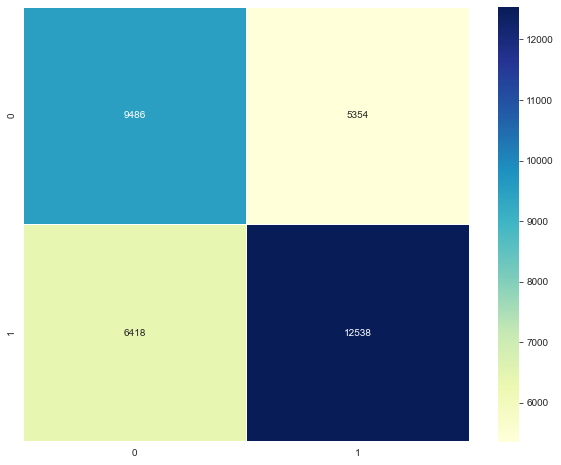

In [17]:
cfm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

In [18]:
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Standardization and model evaluation

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# define features to be scaled 
# col_scale = ['converted_pledged_amount', 'ratio_target', 'duration', 'convert_goal']
col_scale = ['duration', 'convert_goal']

scaler = StandardScaler()

X_train_stand = scaler.fit_transform(X_train[col_scale])
X_test_stand = scaler.transform(X_test[col_scale])

In [21]:
X_train_preprocessed = np.concatenate([X_train_stand, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = np.concatenate([X_test_stand, X_test.drop(col_scale, axis=1)], axis=1)

In [22]:
from sklearn.metrics import classification_report

logistic_regression2 = LogisticRegression(max_iter=1000)
logistic_regression2.fit(X_train_preprocessed, y_train)
y_pred = logistic_regression2.predict(X_test_preprocessed)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


print("Logistic regression score for training set:", round(logistic_regression2.score(X_train_preprocessed, y_train),5))
print("Logistic regression score for test set:", round(logistic_regression2.score(X_test_preprocessed, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

print(logistic_regression2.coef_)

/Users/julianeberek/neuefische/kickstar/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Accuracy:  0.7124807669546692
Logistic regression score for training set: 0.7136
Logistic regression score for test set: 0.71248

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     14840
           1       0.75      0.73      0.74     18956

    accuracy                           0.71     33796
   macro avg       0.71      0.71      0.71     33796
weighted avg       0.71      0

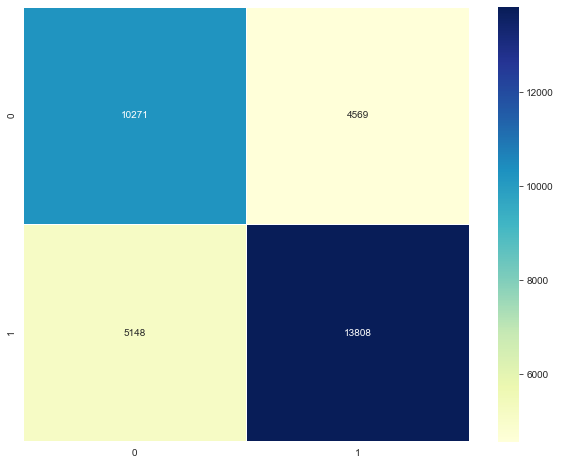

In [23]:
cfm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

In [24]:
# Defining hyperparameters with GridSearch

In [25]:
# Define parameter grid for randomized search
from timeit import default_timer as timer

param_grid = {"penalty" : ["l1", "l2", "elasticnet", "none"],
              "solver" : ["lbfgs", "newton-cg", "saga"],
              "max_iter" : [500, 1000, 1500]
             }

# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(LogisticRegression(random_state=RSEED), param_grid, scoring='accuracy',
                  cv=5, verbose=5, n_jobs=-1, n_iter=10)

# Fit randomized search object to data
start = timer()
rs.fit(X_train_preprocessed, y_train)
end = timer()
rgs_time = end-start

Fitting 5 folds for each of 10 candidates, totalling 50 fits
/Users/julianeberek/neuefische/kickstar/.venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.70559905
 0.71414303 0.71398029 0.70842484        nan]
  warnings.warn(
/Users/julianeberek/neuefische/kickstar/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Best score
print('Best score:', round(rs.best_score_, 3))

# Best parameters
print('Best parameters:', rs.best_params_)

Best score: 0.714
Best parameters: {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 1000}


In [27]:
def print_pretty_summary(name, model, y_test, y_pred_test):
    print(name)
    print('=======================')
    #print('loss: {}'.format(model.loss))
    #print('alpha: {}'.format(model.alpha))
    print('penalty: {}'.format(model.penalty))
    accuracy = accuracy_score(y_test, y_pred_test)
    print('Test accuracy: {:2f}'.format(accuracy))
    return accuracy

In [30]:
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable sgd_best
log_reg_best_rs = rs.best_estimator_

# Making predictions on the test set
y_pred_test_rs = log_reg_best_rs.predict(X_test_preprocessed)

# Let us print out the performance of our model on the test set.
rsgd_accuracy = print_pretty_summary('Log Reg model (randomizedGSCV)', log_reg_best_rs, y_test, y_pred_test_rs)

Log Reg model (randomizedGSCV)
penalty: none
Test accuracy: 0.714434


In [31]:
# Applying best parameters to model 

logistic_regression2 = LogisticRegression(solver='newton-cg', penalty='none', max_iter=1500)
logistic_regression2.fit(X_train_preprocessed, y_train)
y_pred = logistic_regression2.predict(X_test_preprocessed)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


print("Logistic regression score for training set:", round(logistic_regression2.score(X_train_preprocessed, y_train),5))
print("Logistic regression score for test set:", round(logistic_regression2.score(X_test_preprocessed, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

print(logistic_regression2.coef_)

Accuracy:  0.7146999644928393
Logistic regression score for training set: 0.71496
Logistic regression score for test set: 0.7147

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68     14840
           1       0.75      0.73      0.74     18956

    accuracy                           0.71     33796
   macro avg       0.71      0.71      0.71     33796
weighted avg       0.72      0.71      0.72     33796

[[-2.58954335e-01 -1.83057966e+01  2.45042523e+00 -5.55125240e-03
   1.75651452e-02 -3.08807303e-03 -2.03206124e-02  3.92725242e-01
  -2.01156282e-02  4.39959758e-01  2.68313064e-01  4.31597277e-02
   4.57937883e-01  3.49290942e-02  4.31111300e-01  6.86393933e-01
   1.55802801e+00  1.83994949e-01 -2.70947206e-01  6.15722667e-01
   1.14204900e+00 -2.55500520e-01  6.27708656e-02  2.20069101e-01
   3.98495282e-01  4.46096021e-01  8.39979425e-01  6.02648611e-01]]


Feature: 0, Score: -0.25895
Feature: 1, Score: -18.30580
Feature: 2, Score: 2.45043
Feature: 3, Score: -0.00555
Feature: 4, Score: 0.01757
Feature: 5, Score: -0.00309
Feature: 6, Score: -0.02032
Feature: 7, Score: 0.39273
Feature: 8, Score: -0.02012
Feature: 9, Score: 0.43996
Feature: 10, Score: 0.26831
Feature: 11, Score: 0.04316
Feature: 12, Score: 0.45794
Feature: 13, Score: 0.03493
Feature: 14, Score: 0.43111
Feature: 15, Score: 0.68639
Feature: 16, Score: 1.55803
Feature: 17, Score: 0.18399
Feature: 18, Score: -0.27095
Feature: 19, Score: 0.61572
Feature: 20, Score: 1.14205
Feature: 21, Score: -0.25550
Feature: 22, Score: 0.06277
Feature: 23, Score: 0.22007
Feature: 24, Score: 0.39850
Feature: 25, Score: 0.44610
Feature: 26, Score: 0.83998
Feature: 27, Score: 0.60265


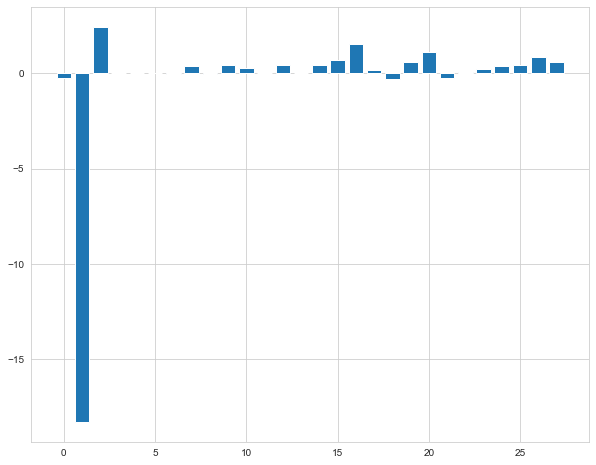

In [32]:
#Calculate feature importance for best regression model

from matplotlib import pyplot

importance = logistic_regression2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [34]:
features_raw.describe()

,subcategy_id,category_id,month_project,weekday,duration,convert_goal,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
count,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,1.689790e+05,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000
mean,171.895200,11.776842,6.426307,2.379793,32.450583,4.109688e+04,0.022701,0.002551,0.045242,0.003024,0.015375,0.004208,0.008569,0.011848,0.105788,0.003888,0.002923,0.010694,0.001337,0.000254,0.009895,0.008587,0.002349,0.004438,0.006350,0.002775,0.724995
std,134.314192,5.620951,3.350045,1.795448,11.748270,1.110957e+06,0.148949,0.050439,0.207836,0.054908,0.123038,0.064730,0.092172,0.108200,0.307567,0.062233,0.053990,0.102856,0.036547,0.015950,0.098979,0.092267,0.048414,0.066474,0.079433,0.052610,0.446518
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,10.000000,4.000000,1.000000,29.000000,1.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.000000,12.000000,6.000000,2.000000,30.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,301.000000,16.000000,9.000000,4.000000,34.000000,1.329770e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,389.000000,26.000000,12.000000,6.000000,93.000000,1.523501e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


AUC: 0.79245


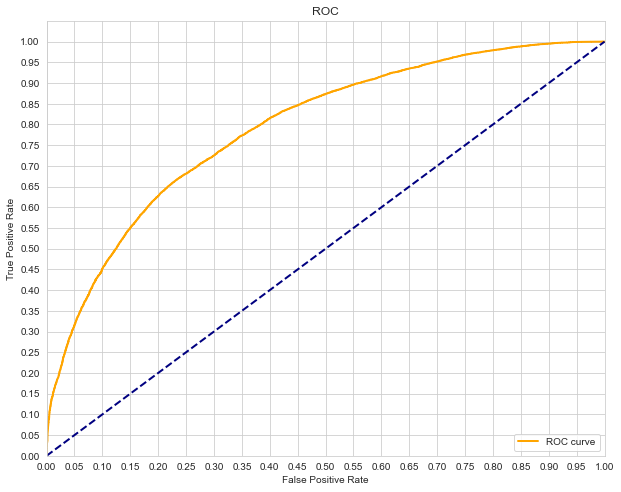

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = logistic_regression2.fit(X_train_preprocessed, y_train).decision_function(X_test_preprocessed)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

#### Cross validation + SGD Classifier

In [36]:
log_reg_scaled = SGDClassifier(random_state=RSEED)
scores_scaled = cross_val_score(log_reg_scaled, X_train_preprocessed, y_train, cv=5, n_jobs=-1)

# Evaluation
print('Score (scaled):', round(scores_scaled.mean(), 4))

Score (scaled): 0.632


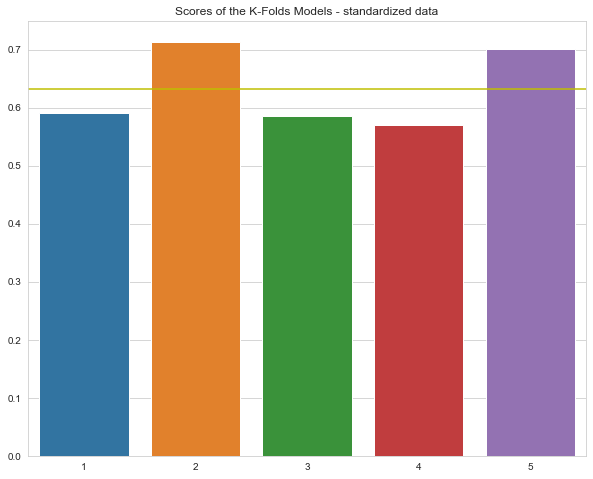

In [37]:
plt.axhline(y=scores_scaled.mean(), color='y', linestyle='-')
sns.barplot(x=[1,2,3,4, 5],y=scores_scaled).set_title('Scores of the K-Folds Models - standardized data');

#### Ridge Regression

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_preprocessed, y_train)

# predict on test-set
y_pred_ridge = ridge.predict(X_test_preprocessed)

# R-squared scores for train and test set
train_score_ridge = ridge.score(X_train_preprocessed, y_train)
test_score_ridge = ridge.score(X_test_preprocessed, y_test)
print("Train score: {:.2f}".format(train_score_ridge))
print("Test score: {:.2f}".format(test_score_ridge))

# RMSE of test set
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 3))

Train score: 0.20
Test score: 0.21
RMSE: 0.442


In [39]:
#Ridge with alpha = 10 

ridge10 = linear_model.Ridge(alpha=10)
ridge10.fit(X_train_preprocessed, y_train)

# predict on test-set
y_pred_ridge10 = ridge10.predict(X_test_preprocessed)

# R-squared scores for train and test set
train_score_ridge = ridge10.score(X_train_preprocessed, y_train)
test_score_ridge = ridge10.score(X_test_preprocessed, y_test)
print("Train score: {:.2f}".format(train_score_ridge))
print("Test score: {:.2f}".format(test_score_ridge))

# RMSE of test set
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 3))

Train score: 0.20
Test score: 0.21
RMSE: 0.442


In [40]:
#Ridge with alpha = 0.1

ridge01 = linear_model.Ridge(alpha=0.1)
ridge01.fit(X_train_preprocessed, y_train)

# predict on test-set
y_pred_ridge01 = ridge01.predict(X_test_preprocessed)

# R-squared scores for train and test set
train_score_ridge = ridge01.score(X_train_preprocessed, y_train)
test_score_ridge = ridge01.score(X_test_preprocessed, y_test)
print("Train score: {:.2f}".format(train_score_ridge))
print("Test score: {:.2f}".format(test_score_ridge))

# RMSE of test set
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 3))

Train score: 0.20
Test score: 0.21
RMSE: 0.442


In [41]:
from sklearn.feature_selection import f_regression

coef = f_regression(X_test_preprocessed, y_test, center=True)
coef

(array([9.16441096e+02, 3.28330570e+01, 2.46324955e+03, 4.76730711e+03,
        1.06914773e+02, 7.13567462e+00, 2.48539738e+01, 4.07316774e+01,
        1.05528602e+01, 8.19333939e-01, 1.44594757e+01, 3.95367260e+01,
        1.61169649e-01, 1.89794515e+01, 5.92462578e+00, 2.08697454e+01,
        7.54341743e+00, 9.61042525e-02, 1.29212441e+02, 1.23996526e-02,
        1.26172947e+00, 2.56592141e+01, 6.13421368e+01, 1.69597297e+00,
        1.05013778e+00, 8.39010870e+00, 3.91583217e-01, 9.39785033e+01]),
 array([1.18598019e-198, 1.01274617e-008, 0.00000000e+000, 0.00000000e+000,
        5.06445295e-025, 7.56014081e-003, 6.21470354e-007, 1.76893425e-010,
        1.16121675e-003, 3.65381431e-001, 1.43459187e-004, 3.25877446e-010,
        6.88084463e-001, 1.32522776e-005, 1.49358527e-002, 4.93333779e-006,
        6.02615755e-003, 7.56557652e-001, 6.90548627e-030, 9.11336513e-001,
        2.61331958e-001, 4.09486791e-007, 4.93671858e-015, 1.92824343e-001,
        3.05482691e-001, 3.77510325e-0

#### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_preprocessed, y_train);



In [43]:
y_prob = model.predict_proba(X_test)

print(model.score)
y_prob[:10].round(2)

<bound method ClassifierMixin.score of GaussianNB()>


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# KNN with 5 neighbours

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_preprocessed, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

Accuracy: 0.74
--------------------------------------------------


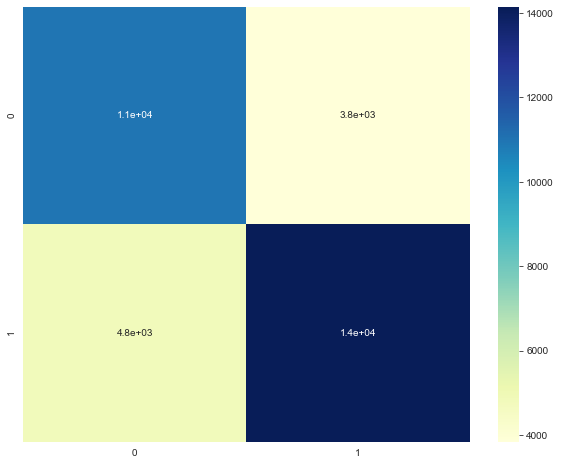

In [46]:
# Predict on test set
y_pred = knn.predict(X_test_preprocessed)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu');

In [47]:
# 4 neighbours
knn2 = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn2.fit(X_train_preprocessed, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

Accuracy: 0.74
--------------------------------------------------


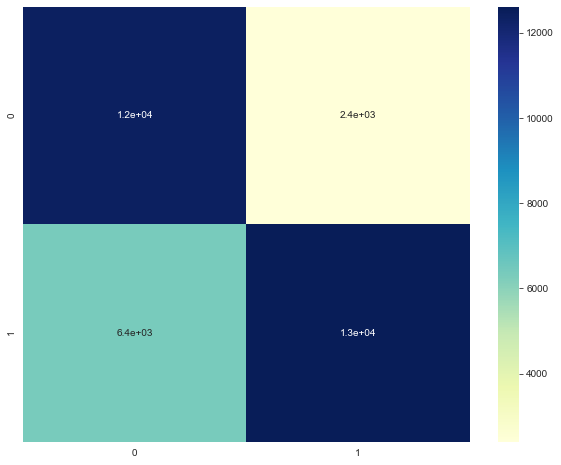

In [48]:
# Predict on test set
y_pred = knn2.predict(X_test_preprocessed)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu');

In [49]:
# 8 neighbours
knn8 = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn8.fit(X_train_preprocessed, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

Accuracy: 0.75
--------------------------------------------------


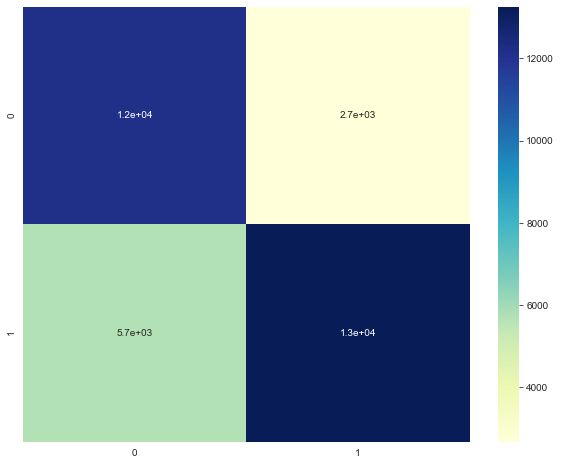

In [50]:
# Predict on test set
y_pred = knn8.predict(X_test_preprocessed)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu');

Text(0, 0.5, 'Model Accuracy')

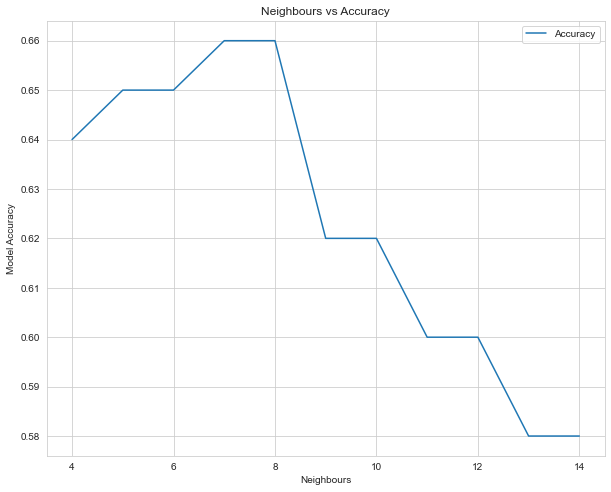

In [51]:
# Calculating accuracy for a range of k-neighbours 
nn = []
accuracy = []
for i in range(4,15):
    nn.append(i)
    knn_x = KNeighborsClassifier(n_neighbors= i, metric='euclidean')
    knn_x.fit(X_train_preprocessed, np.ravel(y_train))
    # Predict on test set
    y_pred = knn_x.predict(X_test)

    # Get accuracy score
    accuracy.append(accuracy_score(y_test, y_pred).round(2))

df = pd.DataFrame({'Neighbours':nn, 'Accuracy' : accuracy})
df.plot(x='Neighbours',y='Accuracy')
plt.title('Neighbours vs Accuracy')
plt.xlabel('Neighbours')
plt.ylabel('Model Accuracy')

In [ ]:
# Why is the highest accuracy only 0.66? knn8 model shows 0.75 accuracy ... 

AUC: 0.81904


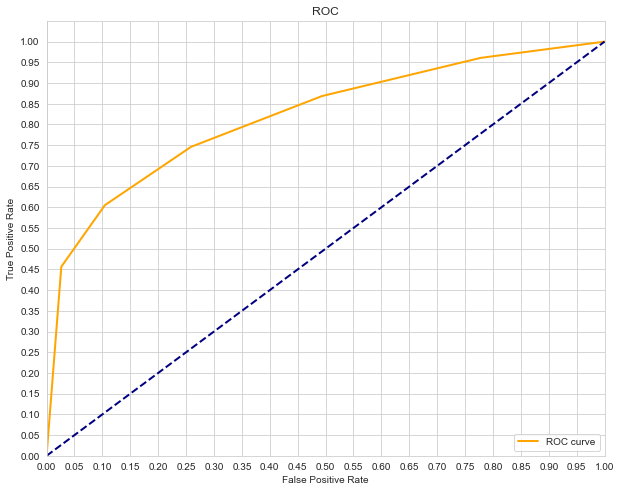

In [127]:
# ROC curve for best KNN model 

y_scores = knn.predict_proba(X_test_preprocessed)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [131]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(knn8, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())


ModuleNotFoundError: No module named 'eli5'